In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset 
import numpy as np

## preparing the data using PyTorch
    1. extract-get the data from Fashion MNIST IMAGE DATA 
    2. Transform put the data in a tensor 
    3. Load- put the data into an object to make it accessible


In [ ]:
# this piece of code is unnecessary if we're using a  standard dataset already available in torchvision.datasets 
# but its a great example to show whats happening under the hood in pytorch
# to create a dataset in pytorch we need to extend the torch.utils.data.Dataset class
# and implement the following methods:

class OHLC(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
    def __getitem__(self,index):
        r = self.data.iloc[index]
        label = torch.tensor(r.is_up_day, dtype=torch.long)
        sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
        return sample,label
    def __len__(self):
        return len(self.data)
# we can create a dataset object by passing the csv file as an argument to the constructor
# and then we can use the dataset object to create a dataloader object by passing it to the DataLoader class
# and then we can use the dataloader object to iterate over the dataset in batches.
# we can also use the dataloader object to get the number of samples in the dataset.
# we can also use the dataloader object to get the number of batches in the dataset


In [10]:
# we're going to ETL the Fashion MNIST dataset

train_set = datasets.FashionMNIST(
    root="./data/FashionMNIST",
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()])
)
train_loader = DataLoader(train_set,batch_size=10)

100%|██████████| 26.4M/26.4M [01:20<00:00, 329kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 265kB/s]
100%|██████████| 4.42M/4.42M [00:23<00:00, 188kB/s] 
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.4MB/s]


In [12]:
# in our case the dataset is balanced as the bins have equal number of samples
# but if we encounter a case of unbalanced dataset then we can use oversampling and undersampling techniques and stratified sampling
# we can also use a combination of these techniques to get a balanced dataset 
# it might be a burden on memory but it yields better resutls 

torch.set_printoptions(linewidth=120)
len(train_set)
print(train_set.targets) # targets are the labels of the train data
train_set.targets.bincount()
# we can see that the bins are balanced

tensor([9, 0, 0,  ..., 3, 0, 5])


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

regarding the paper " A systematic study of the class imbalance problem in convolutional neural networks" by
https://arxiv.org/abs/1710.05381


In [20]:
# Accessing data in the training set
# we use the python built in function iter(),which returns an object representing a stream of data.
# The function next() takes this object and returns the next value from the stream.
# We can use this to iterate over the data
# we get 2 because the data is a tuple of 2 elements, a pair of image and its label

sample = next(iter(train_set))
print(len(sample))

# we can destruct it or sequence unpacking 
image = sample[0]
label = sample[1]


2


label: 9


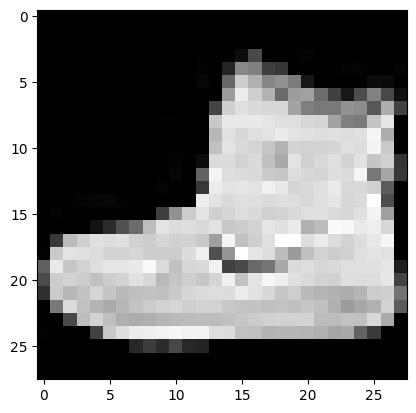

In [27]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:',label)
plt.show()